# The goal of this project is to highlight the importance of establishing a global disease surveillance and response system and sustaining it.  Wildlife are known reservoirs for zoonotic diseases which are a major contributor to emerging diseases.  Hopefully this project will also highlight the importance of better anti-poaching measures to control the spread of these disease which will also improve global security.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('Outbreak_240817.csv')
pd.set_option('display.max_columns', None)
df.head()

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
1,230381,OIE,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,18/08/2017,Confirmed,African swine fever,NaN,"domestic, swine",122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,230333,OIE,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,16/08/2017,Confirmed,Foot and mouth disease,NaN,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
4,230371,OIE,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,17/08/2017,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


# 1. EDA

In [2]:
#Checking for the features with the highest standard deviation
df.describe()

,Id,latitude,longitude,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths
count,17008.000000,17008.000000,17008.000000,9.757000e+03,14535.000000,14168.000000,13005.000000,12235.000000,1068.000000,1417.000000,451.000000
mean,218823.465075,39.168443,37.774981,7.500692e+03,328.183007,199.190147,3765.857978,100.211443,17.701311,1.017643,0.889135
std,7048.338831,16.817821,41.034310,4.427669e+04,5821.929892,4109.453986,28355.192298,4341.287763,26.932867,0.620142,0.321306
min,206270.000000,-36.856210,-146.490000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212070.750000,32.090000,11.950000,1.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,219591.500000,43.821579,24.511700,9.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,224717.250000,48.102805,43.424390,7.160000e+02,5.000000,2.000000,5.000000,0.000000,41.000000,1.000000,1.000000
max,230399.000000,68.392000,144.847374,2.000000e+06,460000.000000,439799.000000,913590.000000,339006.000000,94.000000,24.000000,2.000000


In [3]:
#Checking the percentage of missing values for each feature - a feature selection technique
(df.isnull().sum()*100/ len(df)).sort_values(ascending=False)

humansGenderDesc      97.883349
humansDeaths          97.348307
humansAge             93.720602
humansAffected        91.668627
sumAtRisk             42.632879
serotypes             40.810207
sumSlaughtered        28.063264
sumDestroyed          23.535983
sumDeaths             16.698024
sumCases              14.540216
speciesDescription     9.689558
observationDate        2.951552
country                0.000000
source                 0.000000
latitude               0.000000
longitude              0.000000
region                 0.000000
status                 0.000000
admin1                 0.000000
localityName           0.000000
localityQuality        0.000000
reportingDate          0.000000
disease                0.000000
Id                     0.000000
dtype: float64

# What species is most likely to cause an outbreak?

In [4]:
#Checking what animals cause the most outbreaks/cases
df['speciesDescription'].value_counts().index[0]

'domestic, cattle'

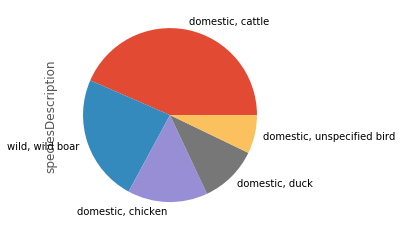

In [5]:
df['speciesDescription'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

# What region/country is most at risk according to this data?

In [6]:
df['country'].value_counts().index[0]

'France'

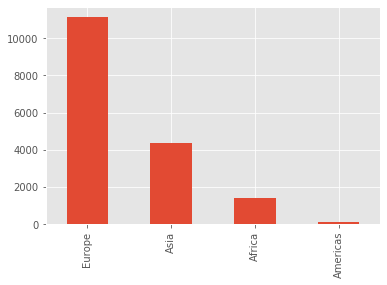

In [7]:
#We also need to consider where the disease came from and where patient zero came from
df['region'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar')

# We will focus on Africa.  Zoonotic diseases still account for many of the health problems in Africa, there has been a re-emergence of Malaria and Yellow Fever in the past 15 years, a spread of HPAI and H5N1 in poultry farms throughout Nigeria and other west African countries.  Most African countries are not prepared to respond to outbreaks.

In [8]:
from arcgis.gis import GIS
gis = GIS()
map1 = gis.map('Africa',5, '3D')
map1

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=5.0)

In [9]:
#Filtering out the dataframe to get back only cases in Africa
Africa_df = df[df['region'] == 'Africa']

In [10]:
Africa_df.head()

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.90000,30.80000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
2,230333,OIE,-21.07774,30.21162,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,16/08/2017,Confirmed,Foot and mouth disease,NaN,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.00000,28.30000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
6,230395,OIE,-26.00000,28.30000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_021,Exact,14/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, goose",34.0,19.0,19.0,0.0,0.0,NaN,0.0,NaN,NaN
9,230394,OIE,-24.60000,27.20000,Africa,South Africa,Limpopo,HPAI_H5N8_2017_022,Exact,12/08/2017,22/08/2017,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",62.0,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
#Checking for redundancies
comparisons = df[['localityName', 'disease', 'localityQuality']]

In [12]:
#I think locality name is just what the locals call the disease and I don't think locality quality will have any 
#influence on our model
comparisons.head()

,localityName,disease,localityQuality
0,HPAI_H5N8_2017_019,Influenza - Avian,Exact
1,Novaya Stanica,African swine fever,Exact
2,Mwambe,Foot and mouth disease,Exact
3,HPAI_H5N8_2017_020,Influenza - Avian,Exact
4,Hvozdná,African swine fever,Exact


In [13]:
Death_table = df[['sumDestroyed', 'sumSlaughtered', 'sumDeaths', 'sumCases']]

In [14]:
#There is some correlation to the total deaths but not much except between cases and deaths
#I think sumDestroyed and sumSlaughtered are the amount of wildlife and livestock killed that were infected
Death_table.corr(method='pearson')

,sumDestroyed,sumSlaughtered,sumDeaths,sumCases
sumDestroyed,1.000000,-0.002761,0.156072,0.173311
sumSlaughtered,-0.002761,1.000000,0.017402,0.010994
sumDeaths,0.156072,0.017402,1.000000,0.706913
sumCases,0.173311,0.010994,0.706913,1.000000


# 2. Feature engineering

In [15]:
#Creating a column for the number of days between the observation of symptoms and the date reporting using 
#the two existing features
Africa_df['reportingDate'] = pd.to_datetime(Africa_df['reportingDate'])

In [16]:
Africa_df['reported_day'] = Africa_df['reportingDate'].dt.day

In [17]:
Africa_df['reported_day'].astype('int64')

0        22
2        16
3        22
6        22
9        22
         ..
17003    18
17004    18
17005    18
17006    18
17007    18
Name: reported_day, Length: 1414, dtype: int64

In [18]:
Africa_df['reported_day'].dtype

dtype('int64')

In [19]:
Africa_df['reported_day'].isnull().sum()

0

In [20]:
Africa_df['observationDate'] = pd.to_datetime(Africa_df['observationDate'])

In [21]:
Africa_df['observationDate'].isnull().sum()

12

In [22]:
#The observation date could be when the patient first starting feeling sick and seeing symptoms
Africa_df['observationDate'].value_counts().index[0]

Timestamp('2017-06-04 00:00:00')

In [23]:
Africa_df['observationDate'].fillna('2017-06-04 00:00:00', inplace=True)

In [24]:
Africa_df['observationDate'] = pd.to_datetime(Africa_df['observationDate'])

In [25]:
Africa_df['obs_day'] = Africa_df['observationDate'].dt.day

In [26]:
#Filling all null values with the most common value
Africa_df['obs_day'].value_counts().index[0]

2

In [27]:
Africa_df['obs_day'].fillna(2, inplace=True)

In [28]:
Africa_df['obs_day'] = Africa_df['obs_day'].astype('int64')

In [29]:
Africa_df['obs_day'].value_counts()

2     93
1     86
3     80
8     74
4     73
23    65
20    59
24    57
6     55
21    49
9     48
7     45
30    42
14    41
31    41
22    41
15    40
18    39
17    37
27    37
10    33
5     33
16    31
25    30
26    30
28    30
29    29
13    28
11    26
19    24
12    18
Name: obs_day, dtype: int64

In [30]:
#The days between the first observation of symptoms and reported case
#I think the longer someone waits to treat the disease, the less likely they are to recover
#I had to use abs() to get the absolute values so there weren't any negatives

Africa_df['Days_since_obs'] = abs(Africa_df['reported_day'] - Africa_df['obs_day'])

In [31]:
Africa_df['Days_since_obs'].astype(int)

0         5
2         0
3         7
6         8
9        14
         ..
17003    12
17004    17
17005     6
17006     9
17007     2
Name: Days_since_obs, Length: 1414, dtype: int32

In [32]:
reported_vs_death_count = Africa_df[['Days_since_obs', 'sumDeaths']]

In [33]:
Africa_df['disease'].value_counts()

Influenza - Avian                    998
Foot and mouth disease               174
Rift Valley fever                     50
Lumpy skin disease                    48
Newcastle disease                     36
African swine fever                   35
Peste des petits ruminants            26
Anthrax                               13
African horse sickness                12
Bluetongue                            10
Contagious bovine pleuropneumonia      4
Sheep pox and goat pox                 4
Brucellosis (Brucella abortus)         2
West Nile Fever                        1
Rabies                                 1
Name: disease, dtype: int64

In [34]:
#The average number of deaths is 595 - 596
#The average deaths per year is 365 per 1,000 adults and these numbers only account for deaths from zoonotic diseases
#It might be helpful to have two additional columns: the total populationof where the disease came from and those in that 
#population who got sick
reported_vs_death_count['sumDeaths'].mean()

595.5150862068965

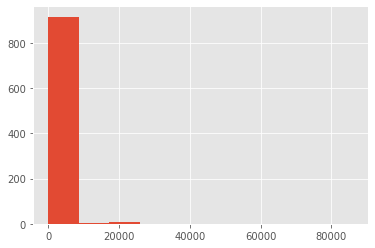

In [35]:
reported_vs_death_count['sumDeaths'].hist();

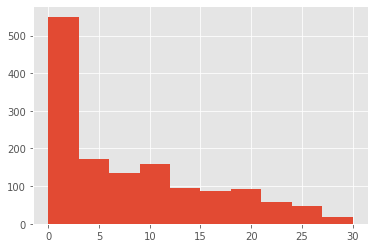

In [36]:
#On average it is between 0 and 5 days
reported_vs_death_count['Days_since_obs'].hist();

In [37]:
Africa_df['Days_since_obs'].isnull().sum()

0

In [38]:
#The percentage of the population at risk who got sick
Africa_df['porportion_of_cases_to_at_risk_pop'] = Africa_df['sumCases'] / Africa_df['sumAtRisk']

In [39]:
Africa_df['porportion_of_cases_to_at_risk_pop'].value_counts().index[0]

1.0

In [40]:
Africa_df['porportion_of_cases_to_at_risk_pop'].fillna(1.0, inplace=True)

In [41]:
Africa_df['porportion_of_cases_to_at_risk_pop'].astype('int64')

0        0
2        0
3        1
6        0
9        0
        ..
17003    1
17004    1
17005    1
17006    1
17007    1
Name: porportion_of_cases_to_at_risk_pop, Length: 1414, dtype: int64

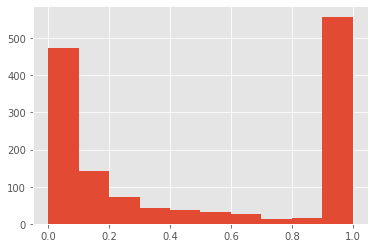

In [42]:
#Maybe the poportion of those who got sick to those at risk came from small populations which would explain the high bar around
#0 - 0.1 and maybe the numbers on the other end between 0.7 and 0.9 came from large populations
#The spike at one is because I filled all the null values with 1
Africa_df['porportion_of_cases_to_at_risk_pop'].hist();

# Does the difference between the reported date and the reported date have any relationship to total deaths and can the sum at risk be used to predict cases?

In [43]:
#Days since observations and the porportion of cases to those at risk
#does have a stronger relation to the sum of deaths than sum of cases
cases = Africa_df[['Days_since_obs', 'porportion_of_cases_to_at_risk_pop', 'sumCases', 'sumDeaths']]

In [44]:
cases.corr()

,Days_since_obs,porportion_of_cases_to_at_risk_pop,sumCases,sumDeaths
Days_since_obs,1.000000,-0.272359,0.011435,0.020488
porportion_of_cases_to_at_risk_pop,-0.272359,1.000000,0.092315,0.148940
sumCases,0.011435,0.092315,1.000000,0.997713
sumDeaths,0.020488,0.148940,0.997713,1.000000


In [45]:
#Checking the new features created and if the sum of the new features make since 
Africa_df.head(2)

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths,reported_day,obs_day,Days_since_obs,porportion_of_cases_to_at_risk_pop
0,230399,OIE,-27.90000,30.80000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,2017-08-17,2017-08-22,Confirmed,Influenza - Avian,H5N8 HPAI,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN,22,17,5,0.000048
2,230333,OIE,-21.07774,30.21162,Africa,Zimbabwe,Masvingo,Mwambe,Exact,2017-08-16,2017-08-16,Confirmed,Foot and mouth disease,NaN,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN,16,16,0,0.087295


In [46]:
#Re-checking the statistics after new columns are added
Africa_df.describe()

,Id,latitude,longitude,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths,reported_day,obs_day,Days_since_obs,porportion_of_cases_to_at_risk_pop
count,1414.000000,1414.000000,1414.000000,9.050000e+02,1316.000000,928.000000,1274.000000,862.000000,81.000000,54.000000,25.0,1414.000000,1414.000000,1414.000000,1414.000000
mean,216268.871287,7.970578,18.724179,8.504718e+03,654.945289,595.515086,2319.010204,55.639211,1.271605,1.037037,1.0,15.245403,14.148515,7.727723,0.493572
std,7763.778481,20.205204,13.099893,7.236161e+04,3627.264136,3744.975256,13942.246019,1074.989782,6.644570,0.272166,0.0,8.869497,9.482088,7.735735,0.437996
min,206375.000000,-34.300000,-23.645005,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000
25%,209840.250000,-3.223400,8.228594,1.800000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,7.000000,5.000000,1.000000,0.050000
50%,213763.500000,10.017470,21.850000,9.200000e+02,29.000000,20.000000,16.000000,0.000000,0.000000,1.000000,1.0,16.000000,14.000000,5.000000,0.333153
75%,223787.750000,27.900371,31.033991,2.541000e+03,150.500000,181.000000,677.500000,0.000000,0.000000,1.000000,1.0,22.000000,23.000000,13.000000,1.000000
max,230399.000000,37.172730,63.416667,2.000000e+06,86000.000000,86000.000000,325789.000000,30500.000000,48.000000,3.000000,1.0,31.000000,31.000000,30.000000,1.000000


In [47]:
Africa_df.drop(['Id', 'longitude', 'latitude','humansAge', 'humansAffected', 'humansDeaths',
               'source', 'admin1', 'localityName', 'localityQuality',
               'status', 'serotypes', 'humansGenderDesc'], axis=1, inplace=True)

In [48]:
#checking column names and shape of the dataframe after dropping features
Africa_df.columns

Index(['region', 'country', 'observationDate', 'reportingDate', 'disease',
       'speciesDescription', 'sumAtRisk', 'sumCases', 'sumDeaths',
       'sumDestroyed', 'sumSlaughtered', 'reported_day', 'obs_day',
       'Days_since_obs', 'porportion_of_cases_to_at_risk_pop'],
      dtype='object')

In [49]:
Africa_df.shape

(1414, 15)

In [50]:
#Let's take care of all null values
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 17007
Data columns (total 15 columns):
region                                1414 non-null object
country                               1414 non-null object
observationDate                       1414 non-null datetime64[ns]
reportingDate                         1414 non-null datetime64[ns]
disease                               1414 non-null object
speciesDescription                    1360 non-null object
sumAtRisk                             905 non-null float64
sumCases                              1316 non-null float64
sumDeaths                             928 non-null float64
sumDestroyed                          1274 non-null float64
sumSlaughtered                        862 non-null float64
reported_day                          1414 non-null int64
obs_day                               1414 non-null int64
Days_since_obs                        1414 non-null int64
porportion_of_cases_to_at_risk_pop    1414 non-null

In [51]:
#Using the most common species to fill speciesDescription
Africa_df['speciesDescription'].value_counts().index[0]       

'domestic, chicken'

In [52]:
Africa_df['speciesDescription'].fillna('domestic, chicken', inplace=True)

In [53]:
#Using the median value to fill all the numeric null values
Africa_df.dropna(inplace=True)

In [54]:
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 16889
Data columns (total 15 columns):
region                                833 non-null object
country                               833 non-null object
observationDate                       833 non-null datetime64[ns]
reportingDate                         833 non-null datetime64[ns]
disease                               833 non-null object
speciesDescription                    833 non-null object
sumAtRisk                             833 non-null float64
sumCases                              833 non-null float64
sumDeaths                             833 non-null float64
sumDestroyed                          833 non-null float64
sumSlaughtered                        833 non-null float64
reported_day                          833 non-null int64
obs_day                               833 non-null int64
Days_since_obs                        833 non-null int64
porportion_of_cases_to_at_risk_pop    833 non-null float64
dtyp

In [55]:
#factorize all object datatypes machine learning algorithms
#Pd.factorize() - obtains numerical representation
Africa_df['region'] = pd.factorize(Africa_df['region'])[0]
Africa_df['country'] = pd.factorize(Africa_df['country'])[0]
Africa_df['disease'] = pd.factorize(Africa_df['disease'])[0]
Africa_df['speciesDescription'] = pd.factorize(Africa_df['speciesDescription'])[0]

In [56]:
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 16889
Data columns (total 15 columns):
region                                833 non-null int64
country                               833 non-null int64
observationDate                       833 non-null datetime64[ns]
reportingDate                         833 non-null datetime64[ns]
disease                               833 non-null int64
speciesDescription                    833 non-null int64
sumAtRisk                             833 non-null float64
sumCases                              833 non-null float64
sumDeaths                             833 non-null float64
sumDestroyed                          833 non-null float64
sumSlaughtered                        833 non-null float64
reported_day                          833 non-null int64
obs_day                               833 non-null int64
Days_since_obs                        833 non-null int64
porportion_of_cases_to_at_risk_pop    833 non-null float64
dtypes: 

In [57]:
Africa_df.head()

,region,country,observationDate,reportingDate,disease,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,reported_day,obs_day,Days_since_obs,porportion_of_cases_to_at_risk_pop
0,0,0,2017-08-17,2017-08-22,0,0,248000.0,12.0,12.0,50000.0,0.0,22,17,5,0.000048
6,0,0,2017-08-14,2017-08-22,0,1,34.0,19.0,19.0,0.0,0.0,22,14,8,0.558824
9,0,0,2017-12-08,2017-08-22,0,0,62.0,5.0,5.0,0.0,0.0,22,8,14,0.080645
13,0,0,2017-11-08,2017-08-22,0,0,266.0,81.0,81.0,135.0,0.0,22,8,14,0.304511
24,0,0,2017-09-08,2017-11-08,0,2,1071.0,22.0,0.0,0.0,0.0,8,8,0,0.020542


In [58]:
Africa_df.set_index(Africa_df['reportingDate'], inplace=True, drop=True)

In [59]:
#Sampling cases monthly
Africa_df['reportingDate'].resample('M')

In [60]:
Africa_df.sort_index(ascending=True, inplace=True)

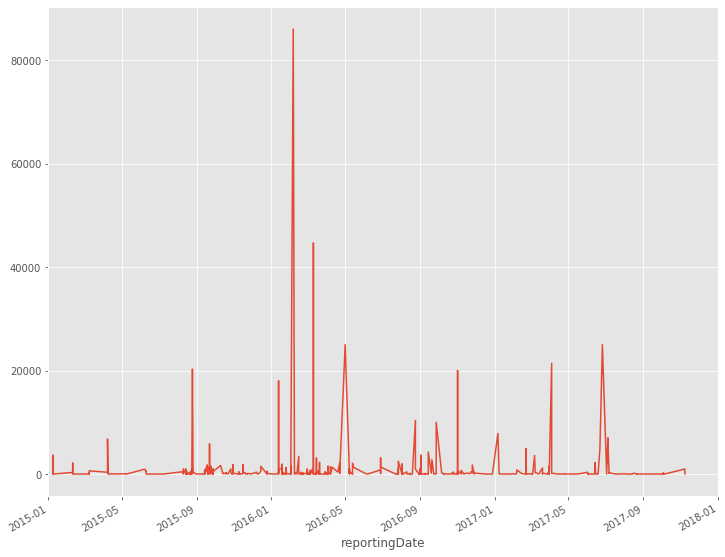

In [61]:
#This is not stationary, a requirement for most models
Africa_df['sumCases'].plot(xlim=['2015-01-01', '2018-01-01'], figsize=(12, 10), grid=True)

# 3. Predicting future cases with SARIMAX

In [62]:
#Making a dataset for the time series models
ts_1 = Africa_df[['sumCases']]

In [63]:
ts_1.head()

,sumCases
reportingDate,
2015-01-09,34.0
2015-01-09,3329.0
2015-01-09,26.0
2015-01-09,3644.0
2015-01-09,3.0


In [64]:
train = ts_1[:821]
test = ts_1[821:]

In [65]:
#Both ma lags and sigma are worth keeping, p - values are lower than 0.05
#1 autoregressive term, 1 differencing term, 1 moving average term
#The 12 at the end os seasonal_order is to use monthly data for predictions
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts_1, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_invertibility=True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           sumCases   No. Observations:                  833
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7973.797
Date:                            Mon, 13 Jul 2020   AIC                          15957.595
Time:                                    12:46:09   BIC                          15981.141
Sample:                                         0   HQIC                         15966.630
                                            - 833                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0045      0.097      0.046      0.963      -0.186       0.195
ma.L1         -0.9999      0.058    -17.230      0.000      -1.114      -0.886
ar.S.L12      -0.0086      0.063     -0.135      0.892      -0.133       0.116
ma.S.L12      -0.9898      0.070    -14.191      0.000      -1.126      -0.853
sigma2      1.546e+07   3.58e-09   4.32e+15      0.000    1.55e+07    1.55e+07
===================================================================================
Ljung-Box (Q):                        5.46   Jarque-Bera (JB):           2750811.25
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.41   Skew:                            14.94
Prob(H) (two-sided):                  0.00   Kurtosis:                       285.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+31. Standard errors may be unstable.
"""

In [66]:
start = len(train)
end = len(train) + len(test) - 1
preds = results.predict(start=start, end=end, typ='levels')

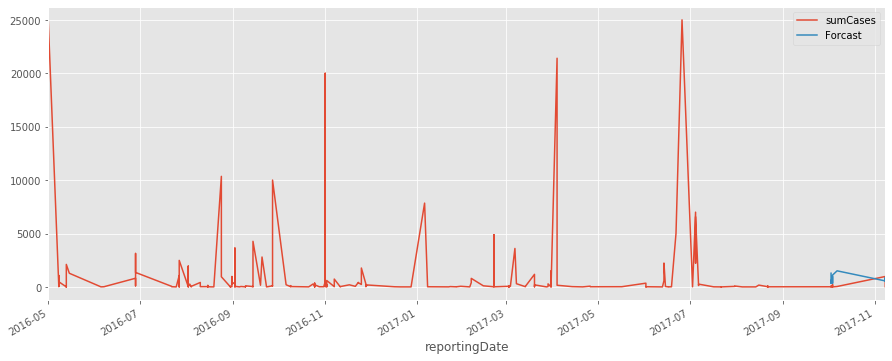

In [67]:
#I think there are to many outside variable and lack of the right kind of data to accurately predict outbreaks
rcParams['figure.figsize'] = 15, 6
ax = ts_1['2016-05-01':].plot(label='Actual')
preds.plot(label='Forcast')
plt.legend()

In [68]:
#This model did not perform well on this dataset
#There are too many variables to consider when trying to predict an disease outbreak
import sklearn
from sklearn.metrics import mean_absolute_error

In [69]:
mean_absolute_error(test, preds)

697.4016759510517

In [70]:
test.describe()

,sumCases
count,12.000000
mean,121.000000
std,275.234115
min,2.000000
25%,8.250000
50%,31.500000
75%,53.000000
max,975.000000


In [71]:
preds.describe()

count      12.000000
mean      749.601185
std       388.937636
min       337.154135
25%       473.952395
50%       558.427543
75%      1004.273505
max      1506.458081
dtype: float64

In [72]:
#Checked new dataframe for sanity check
#ts_1

# 4. Forcasting with a LSTM

In [73]:
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [74]:
len(ts_1)

833

In [75]:
train = ts_1.iloc[:821]
test = ts_1.iloc[821:]

In [76]:
#df[x] -df.max() / df.max() - df.min()
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [77]:
n_input = 4
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
model = Sequential()
model.add(LSTM(200, activation='sigmoid', input_shape=(n_input, n_features)))
model.add(Dropout(0.30))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')
model.fit_generator(generator, epochs=25)

Epoch 1/25
137/137 [==============================] - 1s 7ms/step - loss: 0.0816
Epoch 2/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0621
Epoch 3/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0460
Epoch 4/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0403
Epoch 5/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0304A: 0s - los
Epoch 6/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0252
Epoch 7/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0196
Epoch 8/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0157
Epoch 9/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0143
Epoch 10/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0111
Epoch 11/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0098
Epoch 12/25
137/137 [==============================] - 1s 5ms/step - loss: 0.0084
Epoch 13/25
13

In [78]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [79]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=ts_1[-n_input:].index, columns=['Predictions'])

In [80]:
df_test = pd.concat([ts_1, df_predict])

In [81]:
df_test.tail()

,Predictions,sumCases
reportingDate,,
2017-11-08,NaN,22.0
2017-10-07,917.362237,NaN
2017-11-08,917.393714,NaN
2017-11-08,917.234488,NaN
2017-11-08,917.142540,NaN


In [82]:
train = ts_1
scaler.fit(train)
train = scaler.transform(train)
n_input = 4
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)
history = model.fit_generator(generator, epochs=25)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Epoch 1/25
139/139 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 2/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 3/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0024
Epoch 4/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0024
Epoch 5/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 6/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 7/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 8/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 9/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 10/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 11/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0023- ETA: 1s - loss:
Epoch 12/25
139/139 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 13

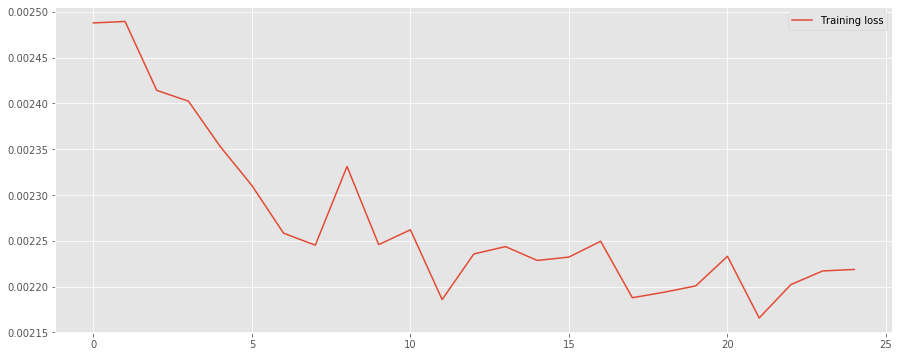

In [83]:
loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

In [84]:
from pandas.tseries.offsets import DateOffset
add_date = [ts_1.index[-1] + DateOffset(months=x) for x in range(0,5)]
future_dates = pd.DataFrame(index=add_date[1:], columns=ts_1.columns)

In [85]:
future_dates.tail()

,sumCases
2017-12-08,NaN
2018-01-08,NaN
2018-02-08,NaN
2018-03-08,NaN


In [86]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Predictions'])

In [87]:
df_proj = pd.concat([ts_1, df_predict])

In [88]:
df_proj.tail()

,Predictions,sumCases
2017-11-08,NaN,22.0
2017-12-08,132.420524,NaN
2018-01-08,132.455566,NaN
2018-02-08,132.449238,NaN
2018-03-08,132.449939,NaN


No handles with labels found to put in legend.


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text yticklabel objects>)

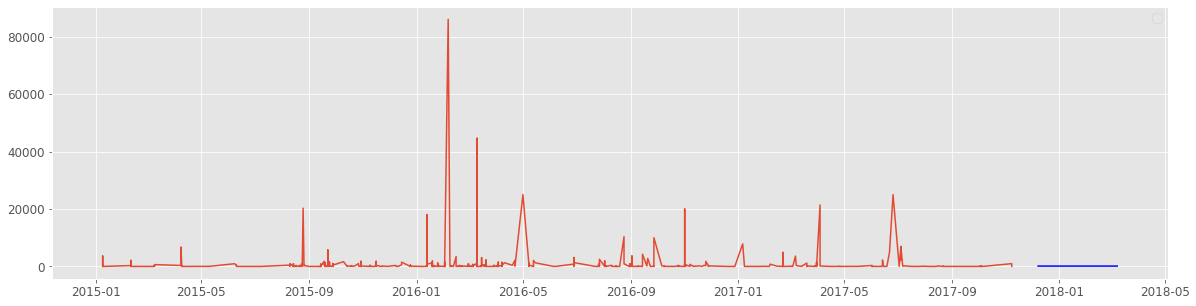

In [89]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['sumCases'])
plt.plot(df_proj.index, df_proj['Predictions'], color='b')
plt.legend(loc='best', fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# To compare these results I think just by looking at the df_proj dataframe and the plot we can tell it is way off.

# 5. More EDA on cites dataset

# Comparisons of wildlife exports and disease outbreaks

In [90]:
cites = pd.read_csv('comptab_2018-01-29 16_00_comma_separated.csv')
cites.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


In [91]:
#Focusing on 2016 when there were spikes of cases
cites['Year'].value_counts()

2016    67007
2017      154
Name: Year, dtype: int64

In [92]:
cites2 = cites[cites['Year'] == 2016]

In [93]:
#ID -Indonesia
#XX - Unknown
#US - United States of America
#VN - Vietnam
#ZW - Zimbabwe
cites2['Origin'].value_counts()

ID    2968
XX    2426
US    2400
VN    1703
ZW    1212
      ... 
CK       1
LY       1
CX       1
MT       1
IQ       1
Name: Origin, Length: 179, dtype: int64

In [94]:
#Filtering dataset to extract the top 5 origin countries for the species traded
countries_of_interest = cites2[(cites2['Origin'] == 'ID') | (cites2['Origin'] == 'XX') | (cites2['Origin'] == 'US') |
                                (cites2['Origin'] == 'VN') | (cites2['Origin'] == 'ZW')]


In [95]:
countries_of_interest.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
22,2016,I,Anas laysanensis,Aves,Anseriformes,Anatidae,Anas,CA,US,XX,NaN,3.0,feathers,NaN,S,I
23,2016,I,Anas laysanensis,Aves,Anseriformes,Anatidae,Anas,MC,FR,XX,2.0,NaN,live,NaN,Z,I
27,2016,I,Branta sandvicensis,Aves,Anseriformes,Anatidae,Branta,MC,FR,XX,2.0,NaN,live,NaN,Z,I
31,2016,I,Antilocapra americana,Mammalia,Artiodactyla,Antilocapridae,Antilocapra,BE,CH,XX,1.0,NaN,skins,NaN,Q,O
32,2016,I,Antilocapra americana,Mammalia,Artiodactyla,Antilocapridae,Antilocapra,CH,BE,XX,NaN,1.0,skins,NaN,Q,O


In [96]:
#Indonesia is The top country of origin for species traded
countries_of_interest['Origin'].value_counts()

ID    2968
XX    2426
US    2400
VN    1703
ZW    1212
Name: Origin, dtype: int64

In [97]:
#I will have to do some more research on Indonesia and the species that live there, their value for being traded, and the 
#diseases they are known to carry
from arcgis.gis import GIS
gis = GIS()
map2 = gis.map('Indonesia',5, '3D')
map2

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=5.0)

In [98]:
# Elephantidae spp. - Asian elephant
# Loxodonta africana - African bush elephant
# Macaca fascicularis - Long-tailed macaque
# Varanus salvator - Asian water monitor 
# Python bivittatus - Burmese python
#Crocodylus porosus - Saltwater crocodile
countries_of_interest['Taxon'].value_counts().head(10)

Alligator mississippiensis    1768
Python reticulatus            1570
Crocodylus niloticus          1128
Python bivittatus              747
Varanus salvator               608
Loxodonta africana             347
Python brongersmai             322
Elephantidae spp.              222
Macaca fascicularis            174
Crocodylus porosus             159
Name: Taxon, dtype: int64

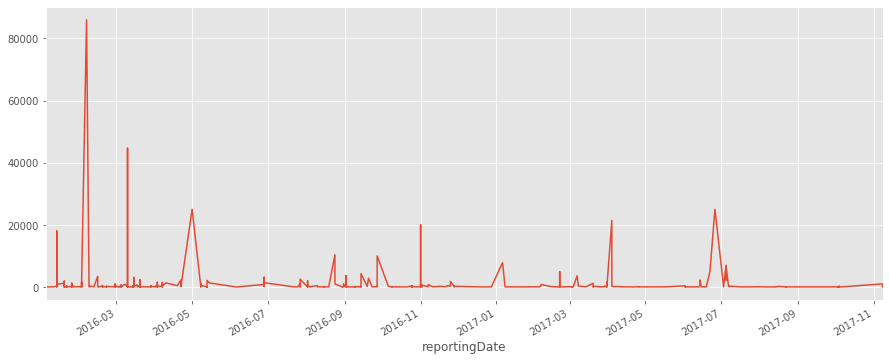

In [99]:
#Some of the speices exported could explain the amount of cases in 2016 - I don't know of any outbreaks cause by the species
#listed above except maybe the macaque
#In the future I will have to go through all the species traded and try to link it all together
Africa_df['sumCases']['2016-01-01':].plot()

# 6. SIR Model. I do not have much experience with modelling infectious diseases with python so this is a very basic model.

# We will model Ebola. Ebola is a highly fatal virus. https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease.

In [112]:
#In this model R will stand for removed
#Duration of infectiousness =1 / recorery rate
#beta * N * duation of infectiousness = total contacts made over duration of infectiousness
#In order for the number of infectious to increase it must be greater than the number of infectious who stop being infectious
#per unit of time - beta *S(t)*I(t) > rI(t)
#Another important interval to consider is the serial interval - onset of primary case to secondary case


N=11000000   #Population with no births or deaths - r0 = beta* N / recovery rate
beta=0.7    #Reproduction number, transmission parameter, the rate at which two individuals come into contact with one another 
#sufficient enough to lead to infection
gamma=0.1  #Recovery rate
I0 = 2   #Initial infected
S0 = N - I0
R0 = 0 

In [113]:
def SIR_model(SIR, beta,gamma):
    
    S,I,R =SIR
    dS_dt = -beta*S*I/N
    dI_dt = beta*S*I/N-gamma*I
    dR_dt =gamma *I
    return ([dS_dt,dI_dt,dR_dt])

In [114]:
SIR = np.array([S0,I0,R0])
propogation_rates = pd.DataFrame(columns={'susceptible': S0,
                                         'infected': I0,
                                         'recovered':R0})


for each_t in np.arange(100):
    
    new_delta = SIR_model(SIR, beta, gamma)
    
    SIR=SIR+new_delta
    
    propogation_rates = propogation_rates.append({'susceptible': SIR[0],
                                         'infected': SIR[1],
                                         'recovered':SIR[2]}, ignore_index=True)


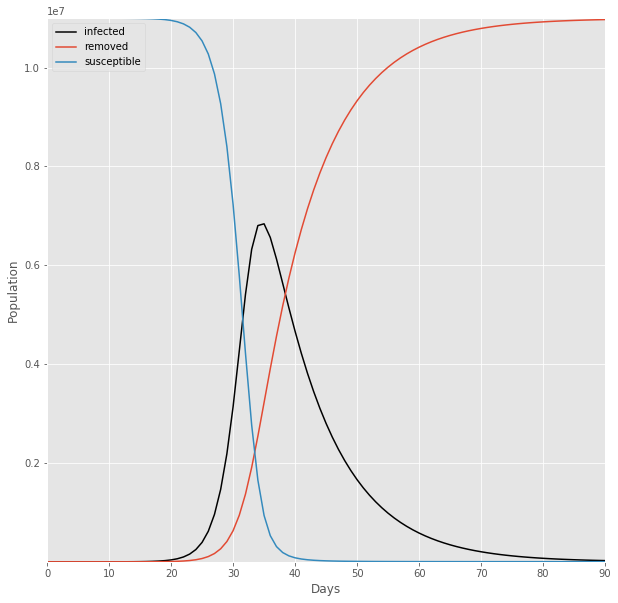

In [115]:
plt.rcParams['figure.figsize']=(10, 10)
plt.style.use('ggplot')

fig, ax1 = plt.subplots(1, 1)

ax1.plot(propogation_rates.index, propogation_rates.infected,label='infected', color='k')
ax1.plot(propogation_rates.index, propogation_rates.recovered,label='removed')
ax1.plot(propogation_rates.index, propogation_rates.susceptible,label='susceptible')


ax1.set_ylim(400, 11000000)
ax1.set_xlim(0, 90)
ax1.set_xlabel('Days')
ax1.set_ylabel('Population')
ax1.legend(loc='best')

# As stated above in the introduction, the goal of this project was to highlight the importance of a global disease surveillance system and having qualified, trained people contributing to it.  There are many factors that have led to the increase in emergence of zoonotic diseases. Human travel and increased mobility, changes in human eating patterns and culture, and rapid shipments of livestock.  This need for better anti-poaching measures should also be considered as a tool to control the spread of zoonotic diseases.

# 1. EDA of EMPRES Global Animal Disease Surveillance dataset

# 2. Feature engineering

# 3. SARIMAX - MAE: 697.401675951051

# 4. LSTM

# 5. EDA of CITES dataset

# 6. SIR Model